In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
BodyBrain_stats = pd.read_csv('~/Downloads/BodyBrainData/BodyBrain_stats.csv')
BodyBrain_raw = pd.read_csv('~/Downloads/BodyBrainData/BodyBrain.csv', low_memory=False)

In [3]:
BodyBrain_raw.drop(['md5', 'id'], inplace=True, axis=1)

In [4]:
BodyBrain_raw.head(50)

,endpoint_div,trayectory_x,control_gene_div,aligned_novelty,unaligned_novelty,inipoint_x,inipoint_y,endpoint_x,fitness,morphology_passive,morpho_gene_div,gene_diversity,morphology_active,trayectory_div,morpho_div,trayectory_y,endpoint_y
0,0.308586,0.154423,4.726854,0.198890,33.489150,0.2142857142857143,0.125000,0.368708,0.156412,17.0,3.520729,4.123791,67.0,0.224663,54.651654,-0.024867,0.100133
1,0.165828,-0.083200,5.383913,0.073788,25.089622,0.17619047619047618,0.095238,0.092991,0.132975,57.0,3.485818,4.434865,69.0,0.191149,41.134564,0.103731,0.198969
2,0.142501,0.015970,4.444183,0.042039,22.927582,0.125,0.136607,0.140970,0.024125,76.0,3.542733,3.993458,36.0,0.141363,46.078072,-0.018083,0.118524
3,0.141001,0.019586,4.638087,0.040602,22.003049,0.11650943396226415,0.171226,0.136096,0.056957,54.0,3.226197,3.932142,52.0,0.151113,39.568349,-0.053484,0.117743
4,0.234076,-0.130079,4.562327,0.154656,26.350995,0.125,0.127778,-0.005079,0.219315,71.0,3.419641,3.990984,73.0,0.237024,44.184463,-0.176575,-0.048797
5,0.181203,-0.006165,4.204373,0.086569,59.356892,0.125,0.075000,0.118835,0.146893,127.0,3.596153,3.900263,17.0,0.214438,86.002024,0.146764,0.221764
6,0.152566,-0.027197,3.814474,0.063058,34.237529,0.125,0.125882,0.097803,0.075539,67.0,3.351111,3.582793,103.0,0.153306,58.302657,-0.070473,0.055409
7,0.139505,0.023108,3.983288,0.040908,31.948008,0.10384615384615384,0.153297,0.126954,0.036155,21.0,3.632692,3.807990,70.0,0.144566,52.677348,-0.027806,0.125490
8,0.232792,0.146091,4.308676,0.132108,28.509344,0.12121212121212123,0.125000,0.267303,0.156445,26.0,3.276625,3.792651,40.0,0.229020,50.419477,0.055968,0.180968
9,0.284084,0.131039,5.097913,0.177512,28.107043,0.20466666666666666,0.078667,0.335706,0.132544,52.0,3.647573,4.372743,23.0,0.205830,49.669236,-0.019918,0.058749


In [5]:
BodyBrain_stats.head(25)

,Indicator,Best,Average,STD,Generation,Run,Method,Median
0,endpoint div,0.663020,0.209255,0.095504,1,1,SO,0.170192
1,trayectory x,0.206277,-0.046426,0.146675,1,1,SO,-0.012462
2,qd-score an,56.392430,56.392430,0.000000,1,1,SO,0.000000
3,control gene div,8.040194,4.837528,0.708771,1,1,SO,4.746406
4,aligned novelty,0.590402,0.119104,0.099255,1,1,SO,0.086234
5,unaligned novelty,70.182836,32.534133,10.148008,1,1,SO,30.575375
6,inipoint x,0.242857,0.122175,0.042640,1,1,SO,0.124453
7,morphology,147.000000,56.920000,31.116774,1,1,SO,0.000000
8,inipoint y,0.216667,0.121209,0.035136,1,1,SO,0.125000
9,endpoint x,0.368708,0.075749,0.148388,1,1,SO,0.109400


In [8]:
BodyBrain_raw[BodyBrain_raw['fitness'] <= 0.]

,endpoint_div,trayectory_x,control_gene_div,aligned_novelty,unaligned_novelty,inipoint_x,inipoint_y,endpoint_x,fitness,morphology_passive,morpho_gene_div,gene_diversity,morphology_active,trayectory_div,morpho_div,trayectory_y,endpoint_y
29171,4.454248,0.000000,0.624372,0.076670,5.099020,0.0,0.000000,0.000000,0.0,51.0,0.425496,0.524934,63.000000,4.474432,4.997039,0.000000,0.0
38650,4.140978,0.000000,1.235637,0.072613,0.000000,0.0,0.000000,0.000000,0.0,46.0,0.499147,0.867392,62.000000,4.154758,0.000000,0.000000,0.0
82893,5.390887,0.000000,0.952200,0.053090,1.414214,0.0,0.000000,0.000000,0.0,50.0,1.568826,1.260513,54.000000,5.327134,18.825185,0.000000,0.0
130679,6.718680,0.000000,0.481527,0.083016,1.414214,0.0,0.000000,0.000000,0.0,39.0,0.151113,0.316320,68.000000,6.650356,1.385929,0.000000,0.0
162771,6.308525,0.000000,2.041579,0.096818,0.000000,0.0,0.000000,0.000000,0.0,38.0,0.193598,1.117589,69.000000,6.230454,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000045,0.358700,0.024621,0.134711,14.000000,9.372873,ca0565c76b65a5fdf18be806da799804,-0.024321,0.093034,0.0,107.0,0.138545,1.134521,0.746611,0.117355,0.000000,9.373201,249944.0
5000046,0.350719,22.745812,0.134711,14.000000,13.499391,24e4d8740514cfe946b342fe74e86f72,-22.138803,-22.021447,0.0,107.0,5.354423,0.657953,0.504336,0.117355,0.000000,13.499105,249945.0
5000047,0.350719,22.745812,0.134711,14.000000,13.499391,24e4d8740514cfe946b342fe74e86f72,-22.138803,-22.021447,0.0,107.0,5.354423,0.657953,0.504336,0.117355,0.000000,13.499105,249946.0
5000048,0.350719,22.745812,0.134711,14.000000,13.499391,24e4d8740514cfe946b342fe74e86f72,-22.138803,-22.021447,0.0,107.0,5.354423,0.657953,0.504336,0.117355,0.000000,13.499105,249947.0


In [49]:
len(grouped_by_run)

20

In [50]:
medians_column = []
# Extract generation medians for all indicators 
for run, run_data in enumerate(grouped_by_run):
    partitioning_indexes = run_data.index[run_data.index % 50 == 0].tolist()
    partitioning_indexes += [run_data.index[-1] + 1]
    # print(len(run_data))
    # For each generation
    for gen, i in enumerate(range(len(partitioning_indexes) - 1)):
        # Select gen+1 generation data
        gen_data = run_data.iloc[partitioning_indexes[gen]:partitioning_indexes[gen+1],:]
        #print(gen_data)
        # print(len(gen_data))
        for indicator_key in desired_indicators:
            if indicator_key in raw_columns:
                medians_column += [np.median(np.array(gen_data[indicator_key]))]
            else:
                medians_column += [0]
        

/home/leguiart/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/leguiart/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/leguiart/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/leguiart/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/leguiart/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/leguiart/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encounte

In [51]:
len(medians_column)

2420600

In [52]:
BodyBrain_stats['Median'] = medians_column

In [9]:
BodyBrain_stats.isnull().sum()
#BodyBrain_stats.dropna()

Indicator        0
Best             0
Average          0
STD              0
Generation       0
Run              0
Method           0
Median        4258
dtype: int64

In [47]:
fitness_stats = BodyBrain_stats[BodyBrain_stats['Indicator'] == 'fitness']
fitness_stats

,Indicator,Best,Average,STD,Generation,Run,Method,Median
10,fitness,0.669476,0.139033,0.125179,1,1,SO,0.113824
35,fitness,0.416883,0.131916,0.097115,2,1,SO,0.103361
60,fitness,0.564108,0.201563,0.104033,3,1,SO,0.160092
85,fitness,0.590653,0.253936,0.117753,4,1,SO,0.251088
110,fitness,0.669476,0.305817,0.126500,5,1,SO,0.285665
...,...,...,...,...,...,...,...,...
2499907,fitness,22.745812,13.683543,11.099018,4996,20,SO,0.000000
2499932,fitness,22.745812,12.065437,11.152443,4997,20,SO,0.000000
2499957,fitness,22.745812,13.297380,11.107962,4998,20,SO,0.000000
2499982,fitness,22.745812,8.454956,10.772437,4999,20,SO,0.000000


In [11]:
fitness_stats.isnull().sum()

Indicator     0
Best          0
Average       0
STD           0
Generation    0
Run           0
Method        0
Median        0
dtype: int64

In [73]:
run1 = fitness_stats[fitness_stats['Run'] == 12]

/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


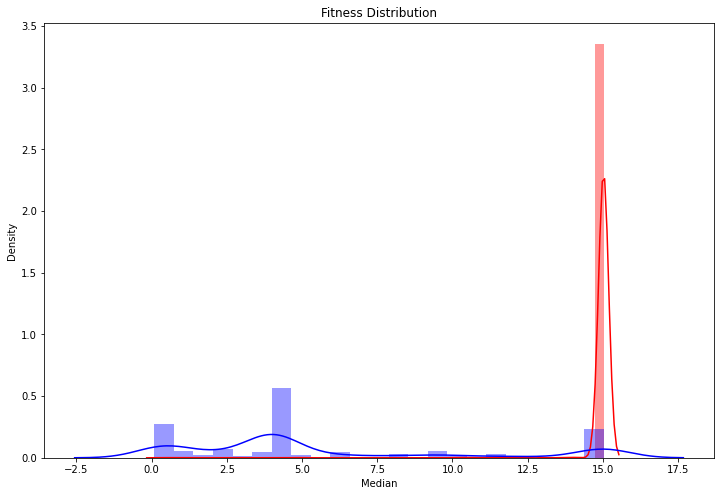

In [74]:
plt.figure(figsize=(12, 8))

sns.distplot(run1['Best'], 
             color='red')

sns.distplot(run1['Median'], 
             color='blue')

plt.title('Fitness Distribution')

plt.show()

Text(0.5, 1.0, 'Generation')

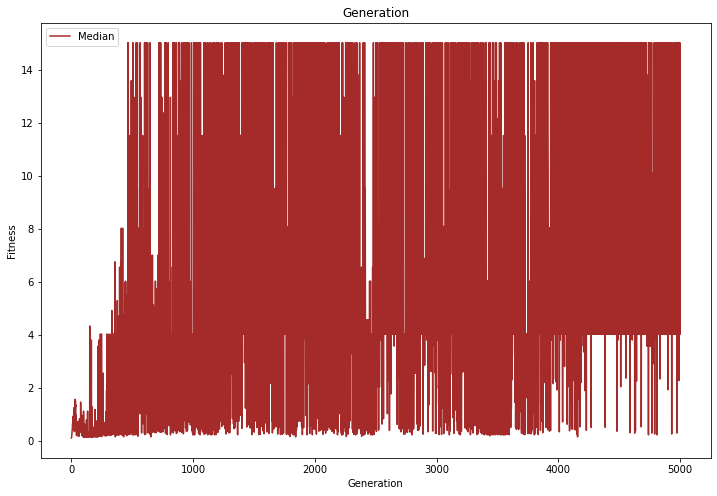

In [75]:
run1.plot(x='Generation', y='Median', 
                    figsize=(12, 8), color='brown')

plt.ylabel('Fitness')
plt.title('Generation')